# EDA parte 2 - Geração de Insights

### Principais problemas de negócio
- Previsão de vendas de empresa varejista
- Previsão de custos e margem líquida
- Verficiar projeção de crescimento
- Categorias e produtos em alta, bem como em baixa
- Projeção de lucro e custos por estado 
- Horas com maiores volumes de vendas
- Dia da semana com maiores volumes de vendas

### Novos Insights 

- Elaborar DF com quantidades vendidas por mês para cada produto, para então verificar se a tendência é crescer ou diminuir 
- Utilizar o gráfico de margem liquida para elaborar uma preisão de crescimento ou n, utilizando regressão para o primeiro mês
- Verificar a quantidade prevista para venda de cada produto com regressão linear, com isso, verificar os custos e projeção de lucros por produto 

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re

In [121]:
# Importação do dataset
data = pd.read_csv('../data/dados_vendas_att2.csv', sep=',')

In [122]:
data.rename(columns={'Custo_Produto': 'Custo_Pedido'}, inplace= True)

In [123]:
data.sample(10)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana
126467,Cabo de Carregamento Turbo,Alimentação,1,14.95,7.4750,14.95,7.4750,GA,Atlanta,17,2019-10-04,Sexta-Feira
82113,iPhone,Roupas,1,700.00,231.0000,700.00,469.0000,CA,San Francisco,14,2019-06-07,Sexta-Feira
49936,Notebook ThinkPad,Eletrônica,1,999.99,329.9967,999.99,669.9933,CA,San Francisco,16,2019-04-26,Sexta-Feira
148553,Pilhas AAA (4 Unidades),Eletrônica,1,2.99,1.4950,2.99,1.4950,CA,San Francisco,9,2019-11-24,Domingo
135230,Fone de Ouvido Esportivo Bose,Roupas,1,99.99,49.9950,99.99,49.9950,TX,Austin,23,2019-10-26,Sábado
76038,Pilhas AAA (4 Unidades),Roupas,1,2.99,1.4950,2.99,1.4950,TX,Dallas,20,2019-06-24,Segunda-Feira
50086,Fone de Ouvido Sem Fio,Esportes,1,11.99,5.9950,11.99,5.9950,NY,New York City,6,2019-04-01,Segunda-Feira
62639,"Monitor Ultrawide 34""",Eletrônica,1,379.99,125.3967,379.99,254.5933,CA,Los Angeles,18,2019-05-08,Quarta-Feira
157690,"Monitor 27"" Full HD",Eletrônica,1,149.99,97.4935,149.99,52.4965,GA,Atlanta,20,2019-11-05,Terça-Feira
142875,Cabo de Carregamento USB-C,Esportes,1,11.95,5.9750,11.95,5.9750,CA,San Francisco,8,2019-10-03,Quinta-Feria


In [124]:
data['Data_Venda'] = pd.to_datetime(data['Data_Venda'])

In [125]:
data['Mes'] = data['Data_Venda'].dt.month

In [126]:
# ALTERAÇÃO DAS CATEGORIAS, POIS ESTÁ DESCONFORME 
data.sample(15)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana,Mes
72464,"Monitor 27"" Full HD",Eletrônica,1,149.99,97.4935,149.99,52.4965,MA,Boston,17,2019-06-13,Quinta-Feria,6
16335,Cabo de Carregamento Turbo,Roupas,1,14.95,7.4750,14.95,7.4750,GA,Atlanta,10,2019-02-06,Quarta-Feira,2
23517,Cabo de Carregamento Turbo,Alimentação,1,14.95,7.4750,14.95,7.4750,NY,New York City,7,2019-03-13,Quarta-Feira,3
41056,Google Phone,Esportes,1,600.00,198.0000,600.00,402.0000,WA,Seattle,22,2019-04-25,Quinta-Feria,4
113575,"Monitor 27"" Full HD",Eletrônica,1,149.99,97.4935,149.99,52.4965,WA,Seattle,13,2019-09-08,Domingo,9
99129,Notebook ThinkPad,Esportes,1,999.99,329.9967,999.99,669.9933,CA,San Francisco,15,2019-07-27,Sábado,7
44722,Notebook Macbook Pro,Alimentação,1,1700.00,561.0000,1700.00,1139.0000,NY,New York City,15,2019-04-23,Terça-Feira,4
49258,Fone de Ouvido Sem Fio,Esportes,1,11.99,5.9950,11.99,5.9950,NY,New York City,18,2019-04-15,Segunda-Feira,4
99603,Fone de Ouvido Esportivo Bose,Esportes,1,99.99,49.9950,99.99,49.9950,NY,New York City,12,2019-08-27,Terça-Feira,8
70986,Pilhas AAA (4 Unidades),Eletrônica,1,2.99,1.4950,2.99,1.4950,CA,San Francisco,11,2019-05-27,Segunda-Feira,5


In [143]:
map_perifericos = ['Fone de Ouvido Sem Fio', 'Apple Airpods', 'Fone de Ouvido Esportivo Bose']
map_alimentacao = ['Cabo de Carregamento USB-C', 'Cabo de Carregamento Turbo', 'Pilhas AAA (4 Unidades)', 'Pilhas AA (4 Unidades)']
map_eletronicos = ['iPhone', 'Google Phone', 'Smartphone Vareebadd','Notebook ThinkPad']
map_monitores = ['Notebook Macbook Pro', 'Monitor 20"', 'Monitor 27" Full HD', 'Monitor gamer 27" 4K', 'Monitor Ultrawide 34"','TV Tela Plana']
map_eletricos = ['Máquina de Lavar Roupas LG', 'Secador LG']

data['Categoria'] = np.where(data['Produto'].isin(map_perifericos), 'Perifericos', 
                    np.where(data['Produto'].isin(map_alimentacao), 'Alimentacao',
                    np.where(data['Produto'].isin(map_eletronicos), 'Eletronicos',
                    np.where(data['Produto'].isin(map_monitores), 'Monitores',
                    np.where(data['Produto'].isin(map_eletricos), 'Eletricos', 'Outros')))))

In [144]:
data.sample(10)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana,Mes
100518,Cabo de Carregamento Turbo,Alimentacao,1,14.95,7.4750,14.95,7.4750,CA,Los Angeles,18,2019-08-24,Sábado,8
37638,Fone de Ouvido Sem Fio,Perifericos,1,11.99,5.9950,11.99,5.9950,OR,Portland,11,2019-04-05,Sexta-Feira,4
178149,Cabo de Carregamento USB-C,Alimentacao,1,11.95,5.9750,11.95,5.9750,GA,Atlanta,9,2019-12-06,Sexta-Feira,12
175032,Fone de Ouvido Sem Fio,Perifericos,1,11.99,5.9950,11.99,5.9950,CA,Los Angeles,23,2019-12-08,Domingo,12
12339,TV Tela Plana,Monitores,1,300.00,99.0000,300.00,201.0000,CA,San Francisco,16,2019-02-13,Quarta-Feira,2
117956,Pilhas AAA (4 Unidades),Alimentacao,2,2.99,2.9900,5.98,2.9900,MA,Boston,16,2019-09-27,Sexta-Feira,9
171287,"Monitor 27"" Full HD",Monitores,1,149.99,97.4935,149.99,52.4965,CA,Los Angeles,11,2019-12-08,Domingo,12
181488,Fone de Ouvido Sem Fio,Perifericos,1,11.99,5.9950,11.99,5.9950,CA,San Francisco,16,2019-12-06,Sexta-Feira,12
181544,Apple Airpods,Perifericos,1,150.00,97.5000,150.00,52.5000,TX,Austin,11,2019-12-03,Terça-Feira,12
97334,Pilhas AA (4 Unidades),Alimentacao,1,3.84,1.9200,3.84,1.9200,GA,Atlanta,20,2019-07-22,Segunda-Feira,7


### Geração de Insight e Análise nos dados

#### Horários e Dias com as maiores saídas 

In [145]:
# horários e dias com maiores saídas de vendas

df_dia = data.groupby('Dia_Semana')[['Faturamento']].agg('sum').reset_index()
df_dia.head()


,Dia_Semana,Faturamento
0,Domingo,4932169.66
1,Quarta-Feira,4988822.26
2,Quinta-Feria,4839465.16
3,Segunda-Feira,4883326.72
4,Sexta-Feira,4855938.38


In [146]:
df_hora = data.groupby('Horario_Venda')[['Faturamento', 'Quantidade_Comprada']].agg('sum').reset_index()
df_hora



,Horario_Venda,Faturamento,Quantidade_Comprada
0,0,713721.27,4428
1,1,460866.88,2619
2,2,234851.44,1398
3,3,145757.89,928
4,4,162661.01,937
5,5,230679.82,1493
6,6,448113.00,2810
7,7,744854.12,4556
8,8,1192348.97,7002
9,9,1639030.58,9816


Text(0, 0.5, 'Faturamento')

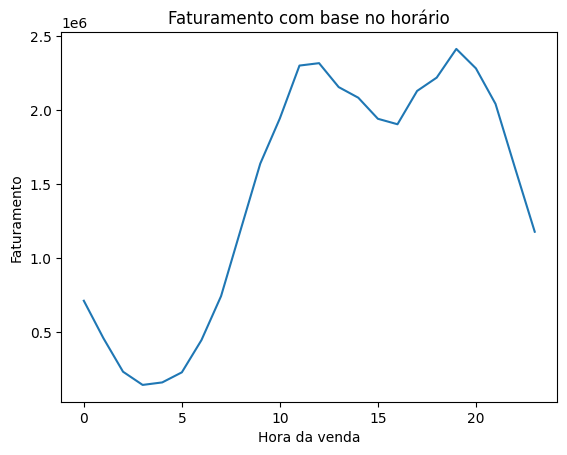

In [147]:
sns.lineplot(x="Horario_Venda", y="Faturamento",
             data=df_hora)
plt.title("Faturamento com base no horário")
plt.xlabel("Hora da venda")
plt.ylabel("Faturamento")

### Panoramas por Estado e cidade

In [148]:
df_estado = data.groupby(['Estado', 'Cidade'])[['Faturamento', 'Quantidade_Comprada']].sum().reset_index().sort_values(by = 'Faturamento', ascending= False)
df_estado


,Estado,Cidade,Faturamento,Quantidade_Comprada
1,CA,San Francisco,8262203.91,50239
0,CA,Los Angeles,5452570.80,33289
5,NY,New York City,4664317.43,27932
3,MA,Boston,3661642.01,22528
2,GA,Atlanta,2795498.58,16602
8,TX,Dallas,2767975.40,16730
9,WA,Seattle,2747755.48,16553
6,OR,Portland,1870732.34,11303
7,TX,Austin,1819581.75,11153
4,ME,Portland,449758.27,2750


In [149]:
# produtos com maiores saídas por estado

df_estado_produtos = data.groupby(['Estado', 'Produto'])[['Faturamento', 'Quantidade_Comprada']].sum().reset_index().sort_values(by = 'Faturamento', ascending= False)
df_estado_produtos.head()

,Estado,Produto,Faturamento,Quantidade_Comprada
11,CA,Notebook Macbook Pro,3207900.00,1887
18,CA,iPhone,1945300.00,2779
12,CA,Notebook ThinkPad,1603983.96,1604
5,CA,Google Phone,1323600.00,2206
87,NY,Notebook Macbook Pro,1116900.00,657


#### Faturamento Temporal

In [150]:
# Margens e volume de entrada e saída de dinheiro

df_faturamento = data[data['Data_Venda'] != '2020-01-01	'].groupby('Data_Venda')[['Custo',	'Faturamento',	'Lucro_Bruto']].sum()

In [151]:
df_faturamento

,Custo,Faturamento,Lucro_Bruto
Data_Venda,,,
2019-01-01,23772.6098,65681.94,41909.3302
2019-01-02,26797.1171,70813.20,44016.0829
2019-01-03,18229.2163,47046.20,28816.9837
2019-01-04,23159.1179,62012.21,38853.0921
2019-01-05,18117.6311,46524.63,28406.9989
...,...,...,...
2019-12-27,48859.3890,126628.05,77768.6610
2019-12-28,52265.4692,134015.50,81750.0308
2019-12-29,59539.0440,156024.62,96485.5760


Text(0, 0.5, 'Lucro_Bruto (U$)')

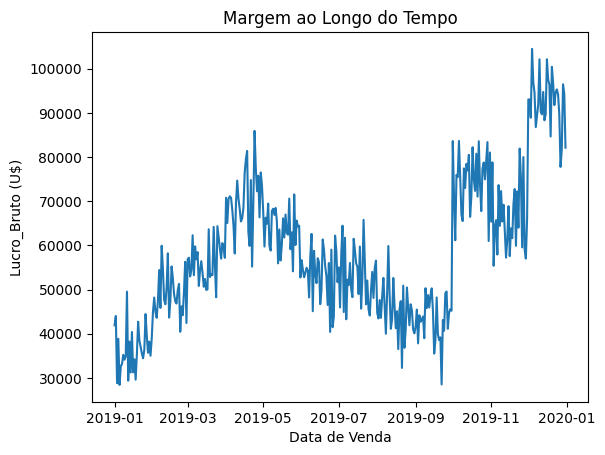

In [152]:
''' Margem de Lucro por dia '''

sns.lineplot(x="Data_Venda", y="Lucro_Bruto",
             data=df_faturamento)
plt.title("Margem ao Longo do Tempo")
plt.xlabel("Data de Venda")
plt.ylabel("Lucro_Bruto (U$)")


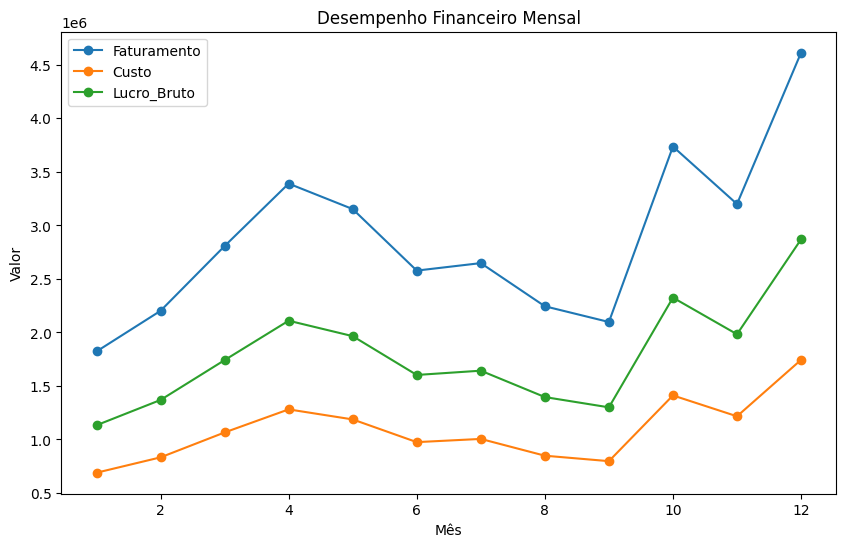

In [153]:
# faturamento por mês
faturamento_mes = data.groupby('Mes')[['Custo',	'Faturamento',	'Lucro_Bruto']].sum().reset_index()
faturamento_mes

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(faturamento_mes['Mes'], faturamento_mes['Faturamento'], label='Faturamento', marker='o')
plt.plot(faturamento_mes['Mes'], faturamento_mes['Custo'], label='Custo', marker='o')
plt.plot(faturamento_mes['Mes'], faturamento_mes['Lucro_Bruto'], label='Lucro_Bruto', marker='o')

# Adicionar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Desempenho Financeiro Mensal')
plt.legend()

# Exibir o gráfico
plt.show()

# Restaurar a configuração padrão após a exibição do gráfico
pd.set_option('display.float_format', None)


<Figure size 1200x800 with 0 Axes>

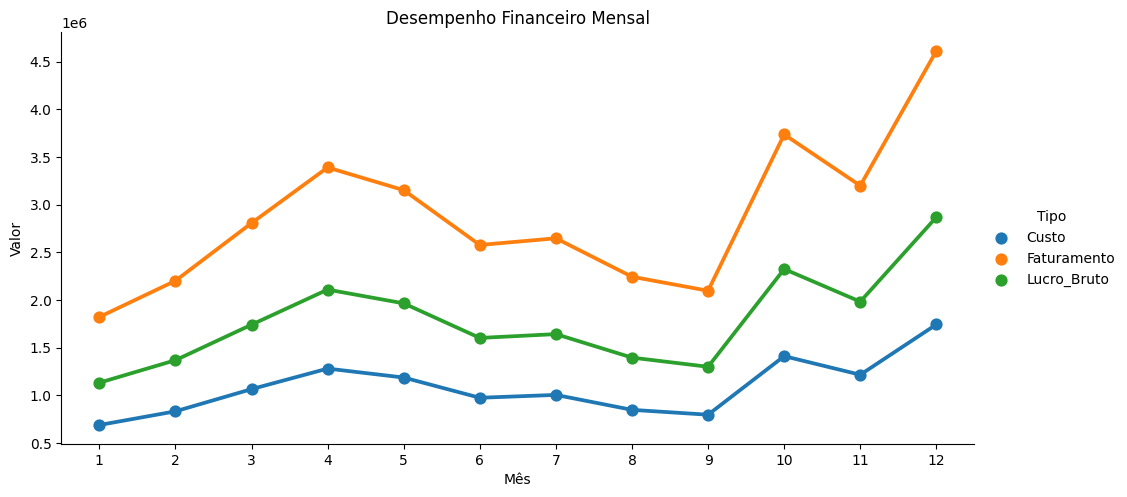

In [154]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Transformar o DataFrame em um formato longo (melt)
faturamento_mes_melted = faturamento_mes.melt(id_vars=['Mes'], var_name='Tipo', value_name='Valor')

# Criar o catplot
plt.figure(figsize=(12, 8))
sns.catplot(x='Mes', y='Valor', hue='Tipo', data=faturamento_mes_melted, kind='point', markers='o', aspect=2)

# Adicionar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Desempenho Financeiro Mensal')

# Exibir o gráfico
plt.show()

# Restaurar a configuração padrão após a exibição do gráfico
pd.set_option('display.float_format', None)

In [155]:
df_faturamento_por_produto = data.groupby(['Cidade', 'Mes', 'Categoria'])[['Faturamento',	'Lucro_Bruto']].sum().reset_index().sort_values(by='Faturamento', ascending= False)
df_faturamento_por_produto

,Cidade,Mes,Categoria,Faturamento,Lucro_Bruto
478,San Francisco,12,Monitores,537582.05,342926.8535
468,San Francisco,10,Monitores,401563.97,256888.7687
477,San Francisco,12,Eletronicos,396998.82,265989.2094
438,San Francisco,4,Monitores,376934.47,241830.0725
443,San Francisco,5,Monitores,368944.91,235894.7121
...,...,...,...,...,...
401,Portland,9,Eletricos,1800.00,1206.0000
366,Portland,2,Eletricos,1800.00,1206.0000
206,Dallas,6,Eletricos,1800.00,1206.0000
361,Portland,1,Eletricos,1200.00,804.0000


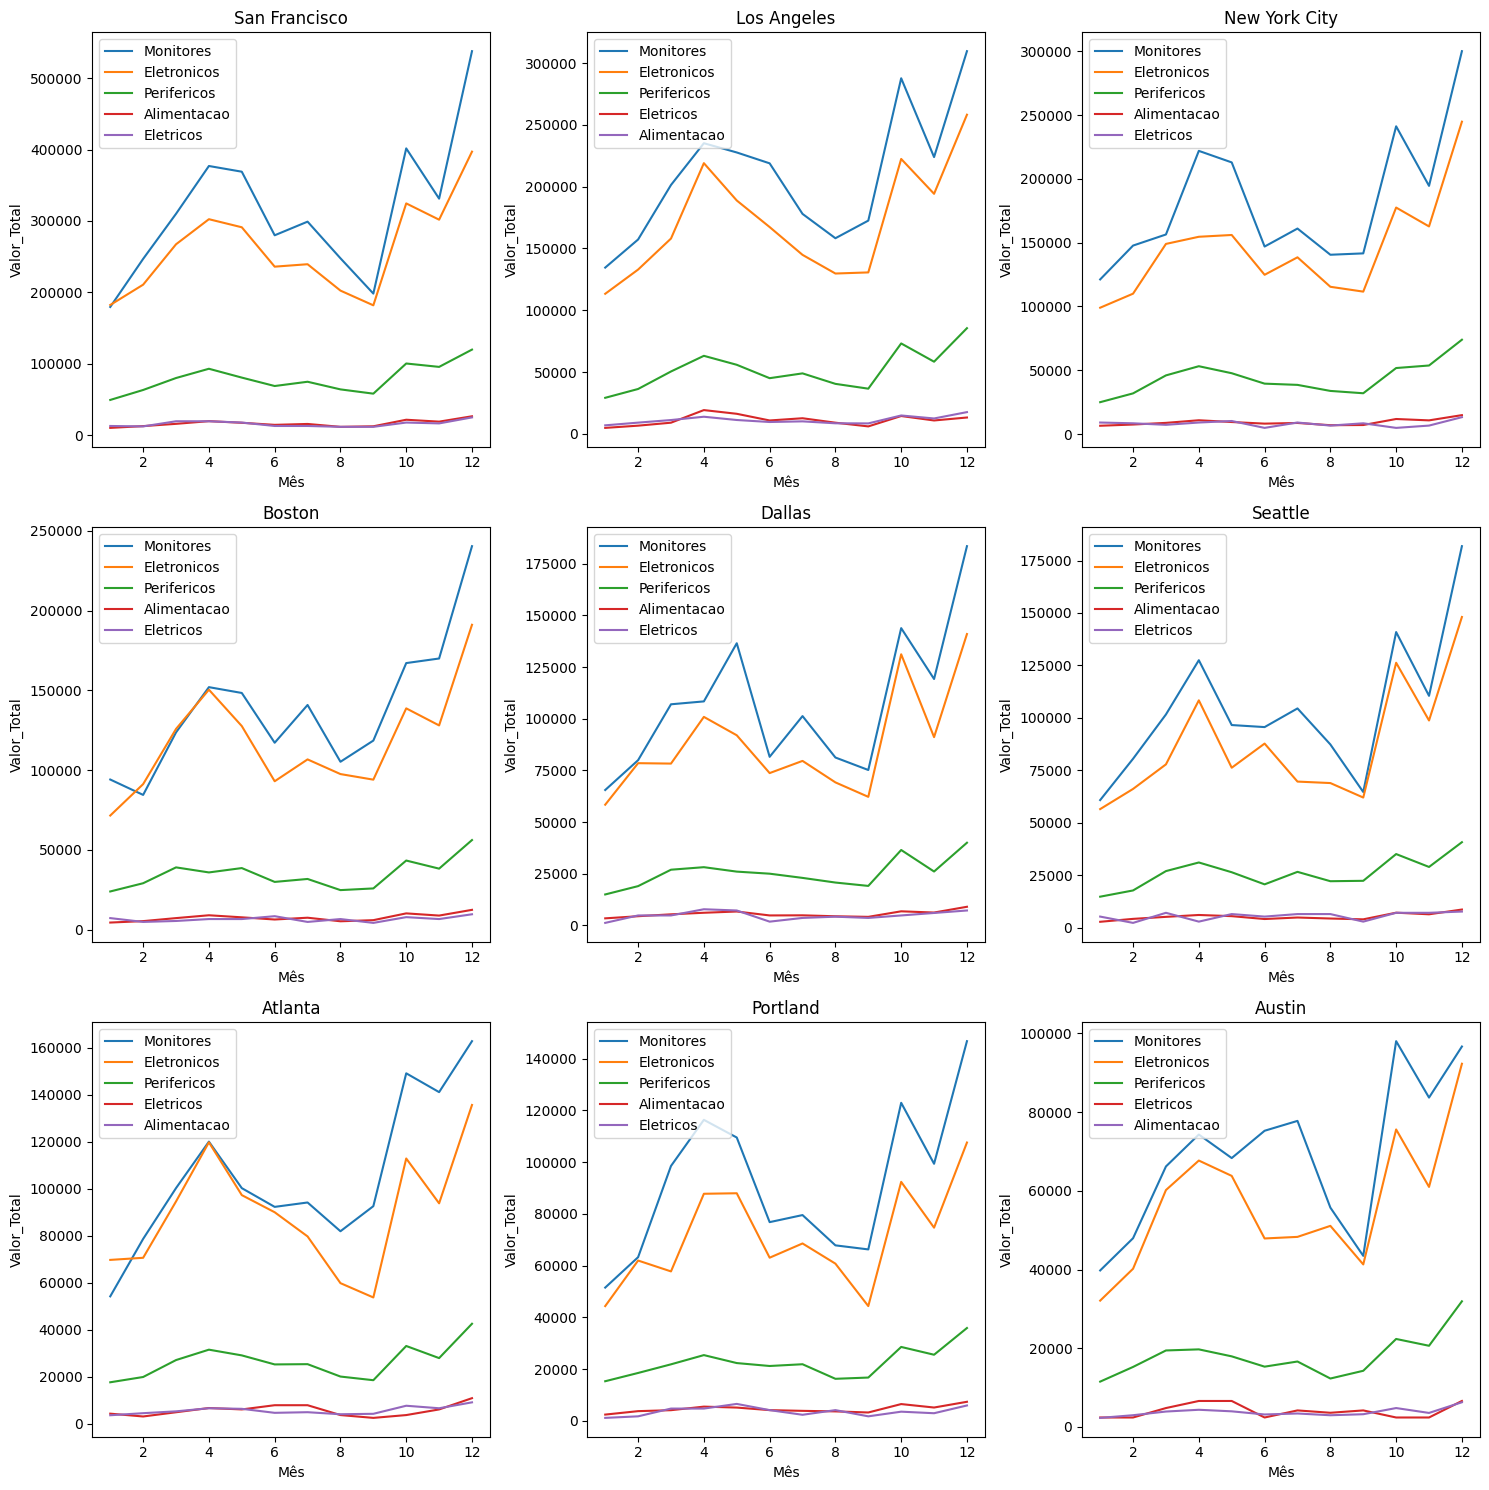

In [156]:
cidades = df_faturamento_por_produto['Cidade'].unique()

# Crie uma figura com uma grade de 3x3 de gráficos de linha
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Loop para criar gráficos separados para cada cidade (máximo de 3x3)
for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        if i * 3 + j < len(cidades):
            cidade = cidades[i * 3 + j]
            cidade_df = df_faturamento_por_produto[df_faturamento_por_produto['Cidade'] == cidade]
            
            # Crie um gráfico de linha para a cidade atual
            sns.lineplot(x="Mes", y="Faturamento", hue="Categoria", data=cidade_df, ax=ax)
            ax.set_title(cidade)
            ax.set_xlabel('Mês')
            ax.set_ylabel('Valor_Total')
            ax.legend(loc='upper left')

# Remova quaisquer subplots não utilizados
for i in range(len(cidades), 9):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

#### Verificando Margem de Lucro por Produtos

In [160]:
'''Avaliação da Margem de lucro por produtos'''

df_avaliacao_produto = data[data['Quantidade_Comprada'] == 1].groupby('Produto')[['Preco_Unitario',	'Custo']].agg('min').reset_index()
df_avaliacao_produto['Margem_Lucro'] = (1 - (df_avaliacao_produto['Custo'] / df_avaliacao_produto['Preco_Unitario'])) * 100
df_avaliacao_produto.sort_values(by = 'Margem_Lucro', ascending= False, inplace= True)

df_avaliacao_produto['Margem_PCT'] = round(df_avaliacao_produto['Margem_Lucro'], 2).astype(str) + ' %'
df_avaliacao_produto

,Produto,Preco_Unitario,Custo,Margem_Lucro,Margem_PCT
9,"Monitor gamer 27"" 4K",389.99,128.6967,67.0,67.0 %
8,"Monitor Ultrawide 34""",379.99,125.3967,67.0,67.0 %
17,TV Tela Plana,300.00,99.0000,67.0,67.0 %
16,Smartphone Vareebadd,400.00,132.0000,67.0,67.0 %
15,Secador LG,600.00,198.0000,67.0,67.0 %
12,Notebook ThinkPad,999.99,329.9967,67.0,67.0 %
11,Notebook Macbook Pro,1700.00,561.0000,67.0,67.0 %
10,Máquina de Lavar Roupas LG,600.00,198.0000,67.0,67.0 %
18,iPhone,700.00,231.0000,67.0,67.0 %
5,Google Phone,600.00,198.0000,67.0,67.0 %


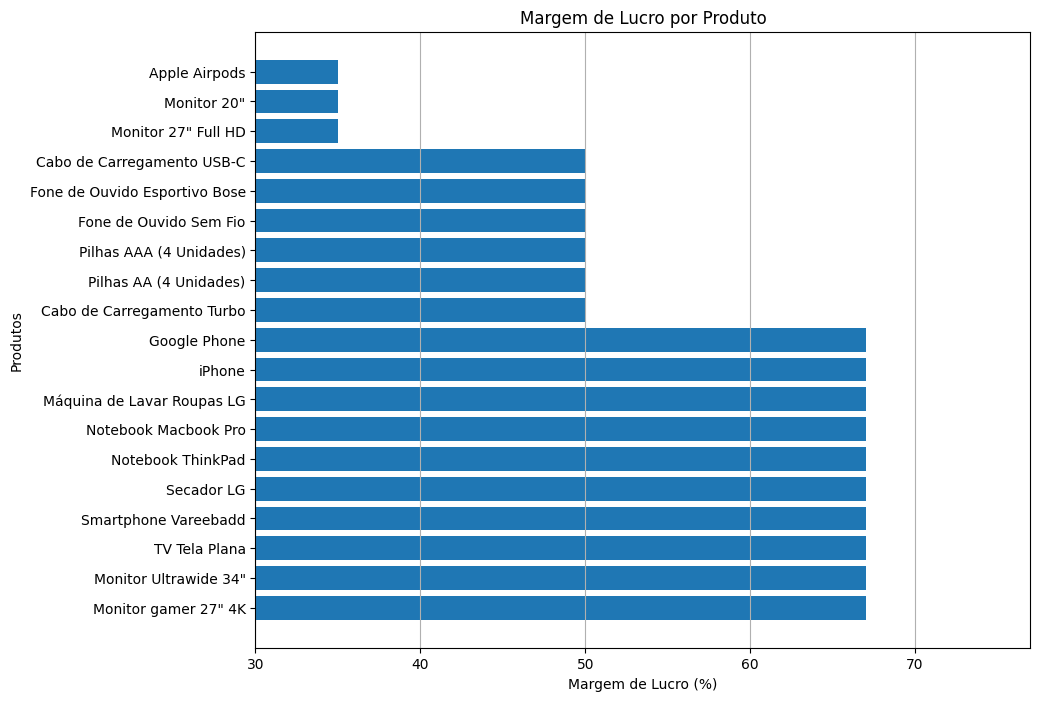

In [158]:
plt.figure(figsize=(10, 8))
plt.barh(df_avaliacao_produto['Produto'], df_avaliacao_produto['Margem_Lucro'])
plt.xlabel('Margem de Lucro (%)')
plt.ylabel('Produtos')
plt.title('Margem de Lucro por Produto')
plt.xlim(30, max(df_avaliacao_produto['Margem_Lucro']) + 10)  # O segundo argumento pode ser ajustado conforme necessário
plt.grid(axis='x')

# Exibir o gráfico
plt.show()

In [159]:
'''
Verificar 
'''
data.sample(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana,Mes
36489,Apple Airpods,Perifericos,1,150.00,97.500,150.00,52.500,CA,Los Angeles,12,2019-03-17,Domingo,3
40335,Pilhas AA (4 Unidades),Alimentacao,1,3.84,1.920,3.84,1.920,NY,New York City,9,2019-04-28,Domingo,4
145202,Cabo de Carregamento Turbo,Alimentacao,1,14.95,7.475,14.95,7.475,OR,Portland,19,2019-11-09,Sábado,11
174428,Cabo de Carregamento Turbo,Alimentacao,1,14.95,7.475,14.95,7.475,NY,New York City,15,2019-12-11,Quarta-Feira,12
10536,Cabo de Carregamento Turbo,Alimentacao,1,14.95,7.475,14.95,7.475,CA,San Francisco,8,2019-02-01,Sexta-Feira,2


In [163]:
# Criação de tabela de custos por produto 
data['Custo_Unitario'] = np.where(data['Quantidade_Comprada'] == 1,
                                  data['Custo'],
                                  data['Custo'] / data['Quantidade_Comprada'])

In [164]:
data.sample(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana,Mes,Custo_Unitario
80070,Fone de Ouvido Esportivo Bose,Perifericos,1,99.99,49.9950,99.99,49.9950,OR,Portland,14,2019-06-12,Quarta-Feira,6,49.9950
12026,Fone de Ouvido Esportivo Bose,Perifericos,1,99.99,49.9950,99.99,49.9950,CA,Los Angeles,18,2019-02-11,Segunda-Feira,2,49.9950
47225,"Monitor 27"" Full HD",Monitores,1,149.99,97.4935,149.99,52.4965,WA,Seattle,21,2019-04-21,Domingo,4,97.4935
140407,Apple Airpods,Perifericos,1,150.00,97.5000,150.00,52.5000,TX,Dallas,16,2019-10-03,Quinta-Feria,10,97.5000
14052,Fone de Ouvido Esportivo Bose,Perifericos,1,99.99,49.9950,99.99,49.9950,GA,Atlanta,20,2019-02-02,Sábado,2,49.9950


In [165]:
# Faturamentopor produto 
faturamento_produto_comparativo = data.groupby(['Produto', 'Custo_Unitario'])['Quantidade_Comprada'].sum().reset_index().sort_values(by = 'Quantidade_Comprada', ascending= True)
faturamento_produto_comparativo

,Produto,Custo_Unitario,Quantidade_Comprada
6,Fone de Ouvido Esportivo Bose,49.9950,6
2,Cabo de Carregamento Turbo,7.4750,291
3,Cabo de Carregamento USB-C,5.9750,477
19,Secador LG,198.0000,646
13,Máquina de Lavar Roupas LG,198.0000,666
17,Pilhas AAA (4 Unidades),1.4950,984
20,Smartphone Vareebadd,132.0000,2068
9,"Monitor 20""",71.4935,4129
15,Notebook ThinkPad,329.9967,4130
14,Notebook Macbook Pro,561.0000,4728


#### Tendencia por produto

In [166]:
faturamento_mes_produto = data.groupby(['Mes', 'Produto'])[['Faturamento',	'Custo', 'Lucro_Bruto']].sum().reset_index().sort_values(by='Faturamento', ascending= False)
faturamento_mes_produto

,Mes,Produto,Faturamento,Custo,Lucro_Bruto
220,12,Notebook Macbook Pro,1093100.00,360723.000,732377.000
182,10,Notebook Macbook Pro,892500.00,294525.000,597975.000
87,5,Notebook Macbook Pro,790500.00,260865.000,529635.000
68,4,Notebook Macbook Pro,771800.00,254694.000,517106.000
201,11,Notebook Macbook Pro,748000.00,246840.000,501160.000
...,...,...,...,...,...
147,8,Pilhas AAA (4 Unidades),6042.79,3021.395,3021.395
33,2,Pilhas AAA (4 Unidades),5896.28,2948.140,2948.140
166,9,Pilhas AAA (4 Unidades),5749.77,2874.885,2874.885
13,1,Pilhas AA (4 Unidades),5468.16,2734.080,2734.080


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

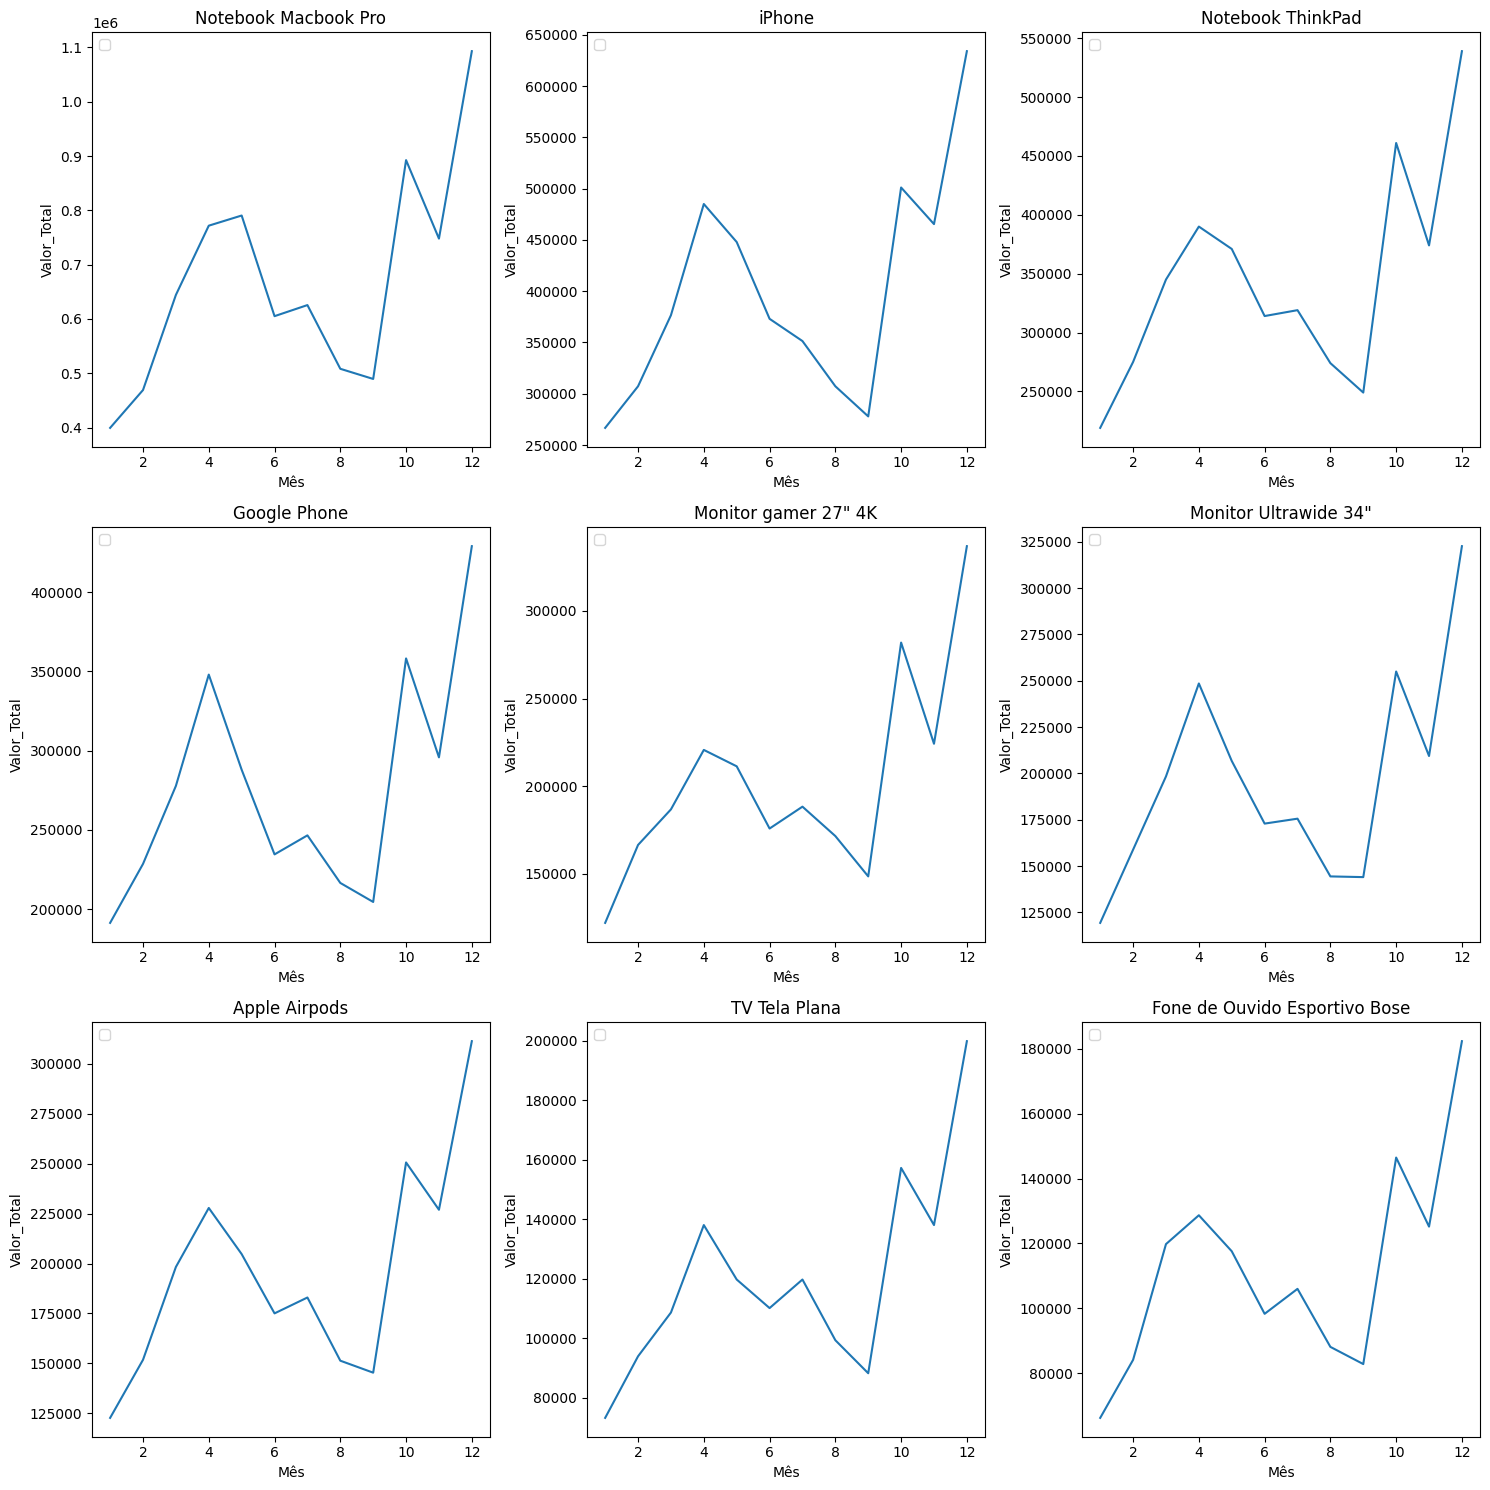

In [167]:
produtos = faturamento_mes_produto['Produto'].unique()

# Crie uma figura com uma grade de 3x3 de gráficos de linha
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Loop para criar gráficos separados para cada produto (máximo de 3x3)
for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        if i * 3 + j < len(produtos):
            produto_atual = produtos[i * 3 + j]
            produto_df = faturamento_mes_produto[faturamento_mes_produto['Produto'] == produto_atual]
            
            # Crie um gráfico de linha para o produto atual
            sns.lineplot(x="Mes", y="Faturamento", data=produto_df, ax=ax)
            ax.set_title(produto_atual)
            ax.set_xlabel('Mês')
            ax.set_ylabel('Valor_Total')
            ax.legend(loc='upper left')

# Remova quaisquer subplots não utilizados
for i in range(len(produtos), 9):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

## Separação de DF para Etapa de Pré Processamento dos dados

- Volume de Vendas 

In [206]:
data.sample(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana,Mes,Custo_Unitario
34191,Cabo de Carregamento USB-C,Alimentacao,1,11.95,5.975,11.95,5.975,CA,San Francisco,15,2019-03-20,Quarta-Feira,3,5.975
93573,Cabo de Carregamento Turbo,Alimentacao,1,14.95,7.475,14.95,7.475,CA,San Francisco,22,2019-07-18,Quinta-Feria,7,7.475
182879,Apple Airpods,Perifericos,1,150.00,97.500,150.00,52.500,CA,Los Angeles,8,2019-12-27,Sexta-Feira,12,97.500
20502,Cabo de Carregamento Turbo,Alimentacao,1,14.95,7.475,14.95,7.475,CA,San Francisco,17,2019-02-26,Terça-Feira,2,7.475
46373,Fone de Ouvido Sem Fio,Perifericos,1,11.99,5.995,11.99,5.995,CA,Los Angeles,23,2019-04-13,Sábado,4,5.995


In [207]:
data_ml = data

In [208]:
data_ml = data_ml.drop(columns = ['Horario_Venda', 'Dia_Semana', 'Mes'])

In [209]:
data_ml.tail(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Data_Venda,Custo_Unitario
185945,Cabo de Carregamento Turbo,Alimentacao,1,14.95,7.475,14.95,7.475,CA,San Francisco,2019-12-11,7.475
185946,Pilhas AA (4 Unidades),Alimentacao,2,3.84,3.840,7.68,3.840,CA,Los Angeles,2019-12-01,1.920
185947,Smartphone Vareebadd,Eletronicos,1,400.00,132.000,400.00,268.000,WA,Seattle,2019-12-09,132.000
185948,Fone de Ouvido Sem Fio,Perifericos,1,11.99,5.995,11.99,5.995,TX,Dallas,2019-12-03,5.995
185949,Fone de Ouvido Esportivo Bose,Perifericos,1,99.99,49.995,99.99,49.995,CA,Los Angeles,2019-12-21,49.995


In [210]:
data_ml['Data_Venda'] = pd.to_datetime(data_ml['Data_Venda']).dt.to_period('M')
data_ml.sample()


,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Data_Venda,Custo_Unitario
14419,Pilhas AAA (4 Unidades),Alimentacao,1,2.99,1.495,2.99,1.495,CA,Los Angeles,2019-02,1.495


In [211]:
data_ml.Categoria.value_counts()

Categoria
Alimentacao    84779
Perifericos    47756
Monitores      33543
Eletronicos    18560
Eletricos       1312
Name: count, dtype: int64

### Criando Datasets para as diferentes categorias

- Faturamento Geral / Custo Geral Operacional
- Esportes
- Roupas 
- Alimentação
- Eletrônica 

In [212]:
df_ml_Alimentacao = data_ml[data_ml['Categoria'] == 'Alimentacao']
df_ml_Perifericos = data_ml[data_ml['Categoria'] == 'Perifericos']
df_ml_Monitores = data_ml[data_ml['Categoria'] == 'Monitores']
df_ml_Eletronicos = data_ml[data_ml['Categoria'] == 'Eletronicos']
df_ml_Eletricos = data_ml[data_ml['Categoria'] == 'Eletricos']

In [213]:
df_ml_Alimentacao.head(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Data_Venda,Custo_Unitario
1,Cabo de Carregamento Turbo,Alimentacao,1,14.95,7.475,14.95,7.475,OR,Portland,2019-01,7.475
5,Pilhas AAA (4 Unidades),Alimentacao,1,2.99,1.495,2.99,1.495,CA,San Francisco,2019-01,1.495
7,Cabo de Carregamento USB-C,Alimentacao,1,11.95,5.975,11.95,5.975,CA,San Francisco,2019-01,5.975
12,Pilhas AAA (4 Unidades),Alimentacao,3,2.99,4.485,8.97,4.485,CA,Los Angeles,2019-01,1.495
18,Cabo de Carregamento USB-C,Alimentacao,1,11.95,5.975,11.95,5.975,CA,Los Angeles,2019-01,5.975


In [214]:
# Função para algterção dos dataframes de produtos
def limpaDF(df):
 df = df.drop(columns = ['Categoria', 'Preco_Unitario', 'Faturamento', 'Lucro_Bruto', 'Estado', 'Cidade', 'Custo_Unitario'])
 df_ordenado = df.groupby(['Produto', 'Data_Venda'])[['Quantidade_Comprada', 'Custo']].sum().reset_index()
 return df_ordenado

In [215]:
df_ml_Alimentacao = limpaDF(df_ml_Alimentacao)
df_ml_Perifericos = limpaDF(df_ml_Perifericos)
df_ml_Monitores = limpaDF(df_ml_Monitores)
df_ml_Eletronicos = limpaDF(df_ml_Eletronicos)
df_ml_Eletricos = limpaDF(df_ml_Eletricos)

In [216]:
df_ml_Monitores

,Produto,Data_Venda,Quantidade_Comprada,Custo
0,"Monitor 20""",2019-01,215,15371.1025
1,"Monitor 20""",2019-02,246,17587.4010
2,"Monitor 20""",2019-03,326,23306.8810
3,"Monitor 20""",2019-04,393,28096.9455
4,"Monitor 20""",2019-05,341,24379.2835
...,...,...,...,...
72,TV Tela Plana,2019-09,294,29106.0000
73,TV Tela Plana,2019-10,524,51876.0000
74,TV Tela Plana,2019-11,460,45540.0000
75,TV Tela Plana,2019-12,666,65934.0000
